<a href="https://colab.research.google.com/github/m-dwaipayan/CDB22DW022-Dwaipayan/blob/main/EDA_using_transport_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
project_data = pd.read_csv('transport.csv')

In [ ]:
project_data.head()

,num;age;sexe;sitfam;principal;voiture;velo;commun;revenu
0,1;25;H;1;1;0;1;0;1200
1,2;29;F;1;3;1;0;1;1330
2,3;35;F;3;1;1;0;0;1850
3,4;19;F;2;4;0;0;1;
4,5;23;H;5;2;;;;2560


In [ ]:
new = project_data["num;age;sexe;sitfam;principal;voiture;velo;commun;revenu"].str.split(";", n = 9, expand = True)

project_data["num"]= pd.to_numeric(new[0])
project_data["age"]= pd.to_numeric(new[1])
project_data["sexe"]= new[2].astype(str)
project_data["sitfam"]= pd.to_numeric(new[3])
project_data["principal"]= pd.to_numeric(new[4])
project_data["voiture"]= pd.to_numeric(new[5])
project_data["velo"]= pd.to_numeric(new[6])
project_data["commun"]= pd.to_numeric(new[7])
project_data["revenu"]= pd.to_numeric(new[8])

project_data.drop(columns =["num;age;sexe;sitfam;principal;voiture;velo;commun;revenu"], inplace = True)

In [ ]:
project_data.head()

,num,age,sexe,sitfam,principal,voiture,velo,commun,revenu
0,1,25,H,1,1,0.0,1.0,0.0,1200.0
1,2,29,F,1,3,1.0,0.0,1.0,1330.0
2,3,35,F,3,1,1.0,0.0,0.0,1850.0
3,4,19,F,2,4,0.0,0.0,1.0,NaN
4,5,23,H,5,2,NaN,NaN,NaN,2560.0


In [ ]:
project_data.describe()

,num,age,sitfam,principal,voiture,velo,commun,revenu
count,50.00000,50.000000,50.00000,50.000000,46.000000,46.000000,46.000000,47.000000
mean,25.50000,31.980000,3.00000,1.920000,0.586957,0.347826,0.478261,1756.170213
std,14.57738,9.190701,2.10926,1.103612,0.497821,0.481543,0.505047,564.390988
min,1.00000,19.000000,1.00000,1.000000,0.000000,0.000000,0.000000,900.000000
25%,13.25000,23.250000,2.00000,1.000000,0.000000,0.000000,0.000000,1325.000000
50%,25.50000,32.500000,3.00000,1.000000,1.000000,0.000000,0.000000,1600.000000
75%,37.75000,38.000000,3.00000,3.000000,1.000000,1.000000,1.000000,2155.000000
max,50.00000,48.000000,9.00000,4.000000,1.000000,1.000000,1.000000,3200.000000


In [ ]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   num        50 non-null     int64  
 1   age        50 non-null     int64  
 2   sexe       50 non-null     object 
 3   sitfam     50 non-null     int64  
 4   principal  50 non-null     int64  
 5   voiture    46 non-null     float64
 6   velo       46 non-null     float64
 7   commun     46 non-null     float64
 8   revenu     47 non-null     float64
dtypes: float64(4), int64(4), object(1)
memory usage: 3.6+ KB


In [ ]:
project_data.isna().sum()

num          0
age          0
sexe         0
sitfam       0
principal    0
voiture      4
velo         4
commun       4
revenu       3
dtype: int64

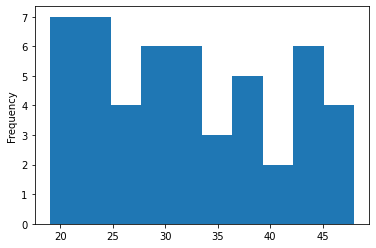

In [27]:
project_data['age'].plot(kind='hist')

<Figure size 864x576 with 0 Axes>

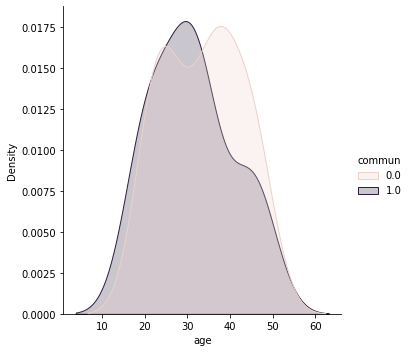

In [ ]:
plt.figure(figsize=(12,8))
sns.displot(data=project_data, x="age", hue="commun", kind="kde", fill=True)

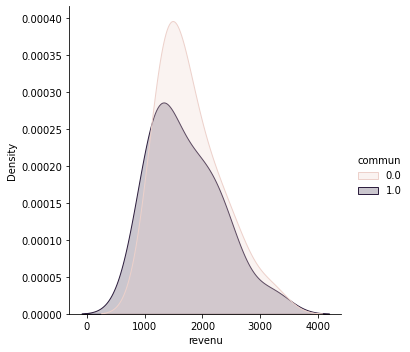

In [ ]:
sns.displot(data=project_data, x="revenu", hue="commun", kind="kde", fill=True)

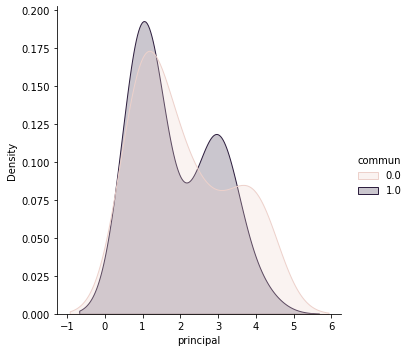

In [ ]:
sns.displot(data=project_data, x="principal", hue="commun", kind="kde", fill=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


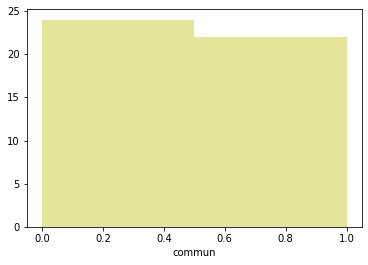

In [ ]:
chart = sns.distplot(project_data["commun"], kde=False, color='y')

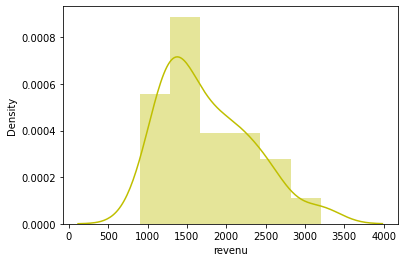

In [ ]:
chart = sns.distplot(project_data["revenu"],  color='y')

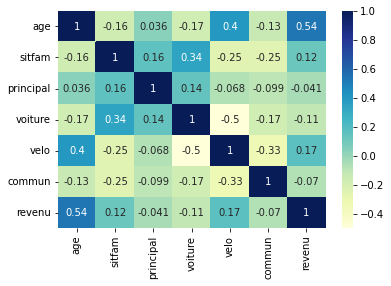

In [ ]:
data_new = project_data.drop(columns=["num"])
corr = data_new.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")

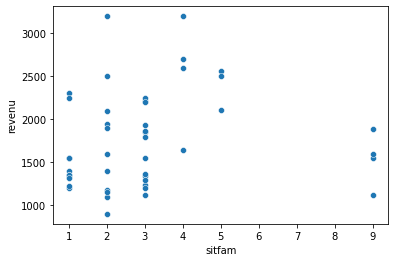

In [28]:
sns.scatterplot(data=project_data,x='sitfam',y='revenu')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


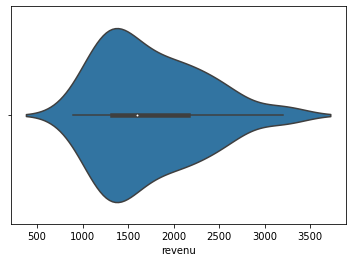

In [29]:
sns.violinplot(project_data['revenu'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


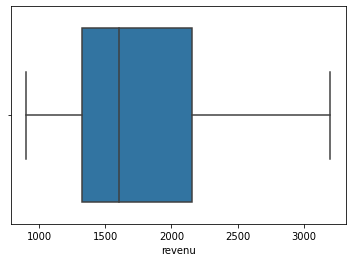

In [30]:
sns.boxplot(project_data['revenu'])